In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
df = pd.read_csv('/content/AB_NYC_2019.csv')


In [5]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [7]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [8]:
df.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [9]:
#df[df['name'].isnull()]
#df[df['host_name'].isnull()]
#df[df['reviews_per_month'].isnull()]


In [10]:
df['reviews_per_month'] = df['reviews_per_month'].fillna(df['reviews_per_month'].median())

In [11]:
#df.isna().sum()
df['reviews_per_month']
#df['reviews_per_month'].median()

0        0.21
1        0.38
2        0.72
3        4.64
4        0.10
         ... 
48890    0.72
48891    0.72
48892    0.72
48893    0.72
48894    0.72
Name: reviews_per_month, Length: 48895, dtype: float64

In [12]:
df.drop(['host_name','name','last_review'],axis=1,inplace=True)

In [13]:
df.isna().sum()

id                                0
host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [14]:
df.duplicated().sum()

0

In [15]:
df.nunique()


id                                48895
host_id                           37457
neighbourhood_group                   5
neighbourhood                       221
latitude                          19048
longitude                         14718
room_type                             3
price                               674
minimum_nights                      109
number_of_reviews                   394
reviews_per_month                   937
calculated_host_listings_count       47
availability_365                    366
dtype: int64

In [16]:
#df.groupby('neighbourhood_group')['price'].median()
df.groupby('neighbourhood_group')['price'].mean()

neighbourhood_group
Bronx             87.496792
Brooklyn         124.383207
Manhattan        196.875814
Queens            99.517649
Staten Island    114.812332
Name: price, dtype: float64

In [17]:
#df.groupby('neighbourhood_group')['reviews_per_month'].max()
df.groupby('neighbourhood_group')['reviews_per_month'].median()

neighbourhood_group
Bronx            0.87
Brooklyn         0.72
Manhattan        0.72
Queens           0.76
Staten Island    1.00
Name: reviews_per_month, dtype: float64

In [18]:
#df.groupby('room_type')['price'].median()
df.groupby('room_type')['minimum_nights'].median()

room_type
Entire home/apt    3.0
Private room       2.0
Shared room        1.0
Name: minimum_nights, dtype: float64

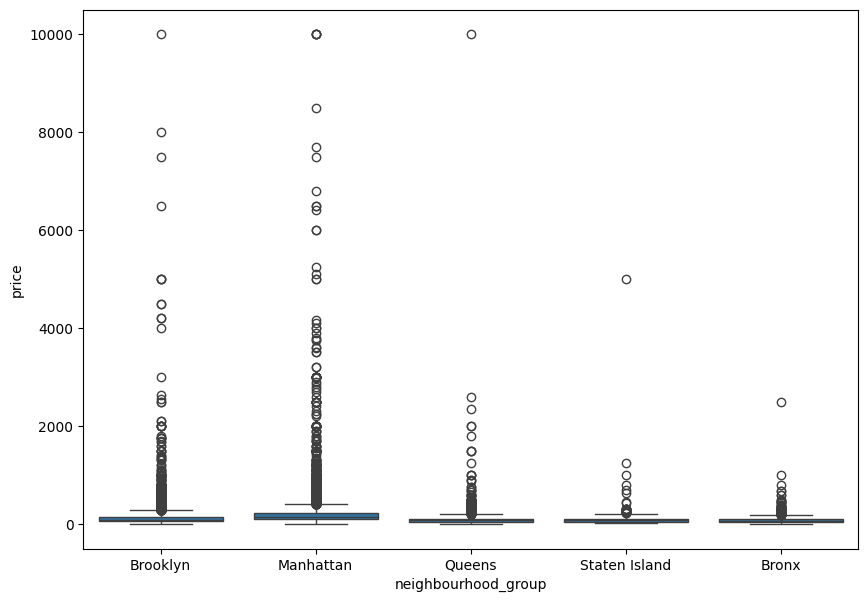

In [19]:
plt.figure(figsize=(10,7))
sns.boxplot(x = "neighbourhood_group", y = "price", data = df)
plt.show()

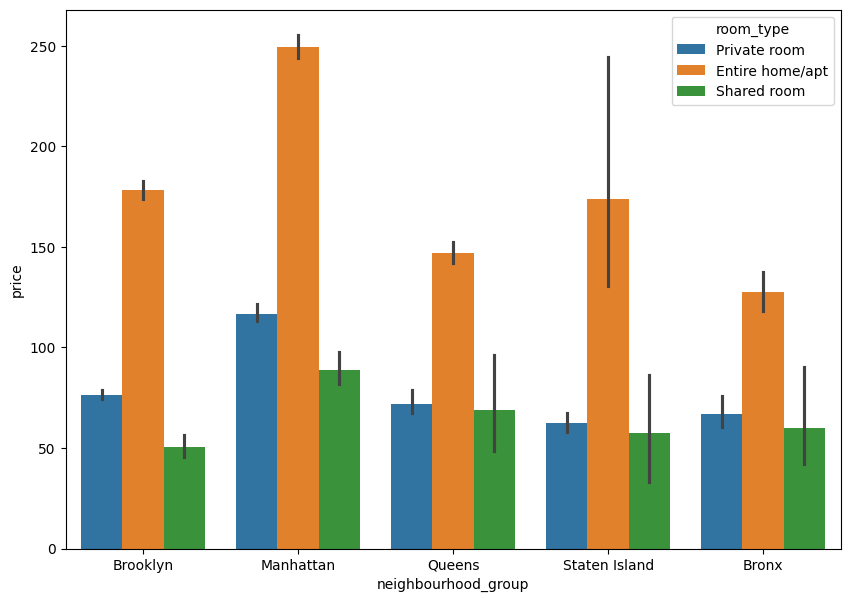

In [20]:
plt.figure(figsize=(10,7))
sns.barplot(x = "neighbourhood_group", y = "price", hue = "room_type", data = df)
plt.show()

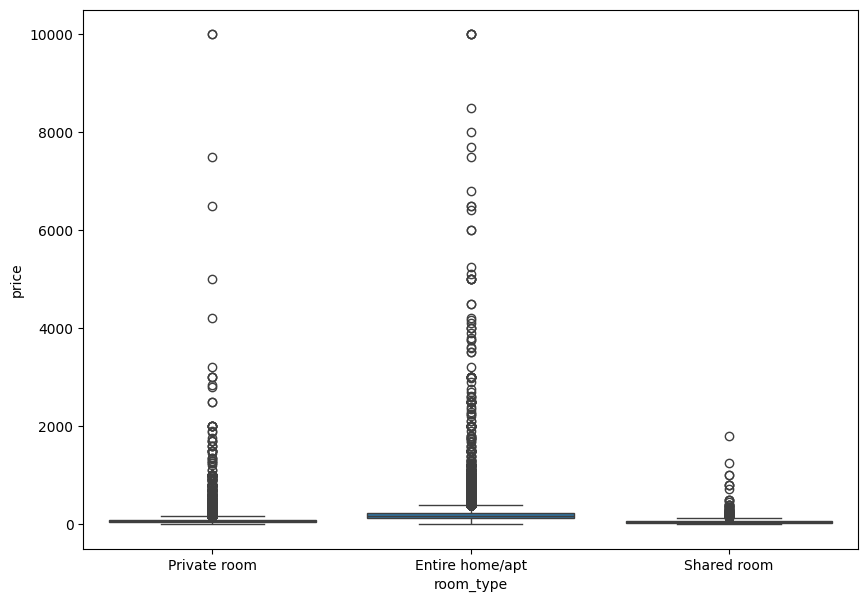

In [21]:
plt.figure(figsize=(10,7))
sns.boxplot(x ="room_type", y = "price" , data = df)
plt.show()

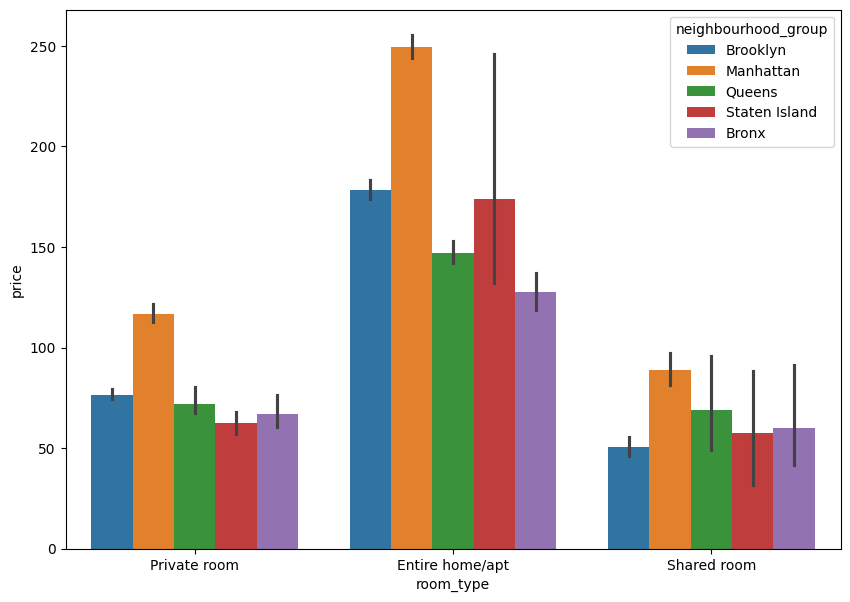

In [22]:
plt.figure(figsize=(10,7))
sns.barplot(x ="room_type", y = "price", hue ="neighbourhood_group" , data = df)
plt.show()

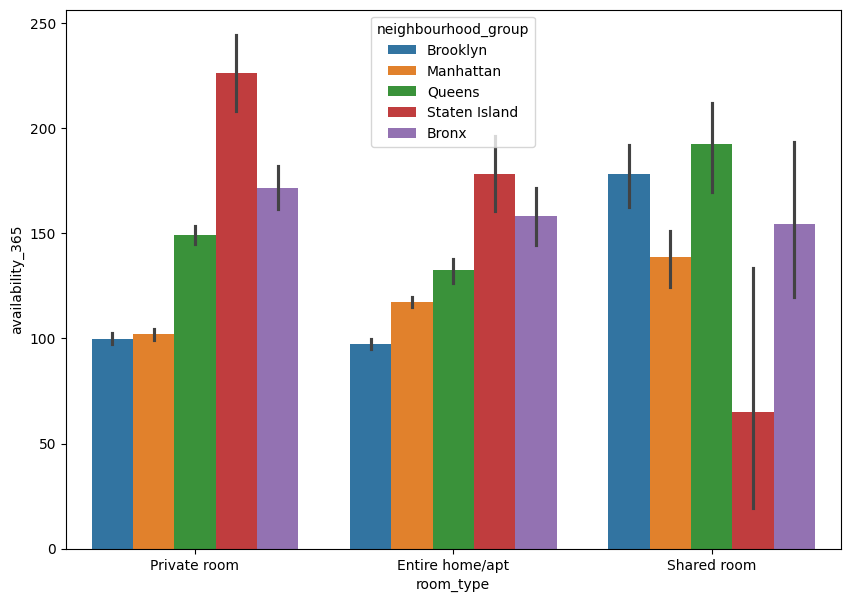

In [23]:
plt.figure(figsize=(10,7))
sns.barplot(x ="room_type", y = "availability_365", hue ="neighbourhood_group" , data = df)
plt.show()

In [24]:
print('availability per room type')
print(df.groupby('room_type')['availability_365'].median())
print('-'*50)
print('availability per neighbourhood')
print(df.groupby('neighbourhood_group')['availability_365'].median())

availability per room type
room_type
Entire home/apt    42.0
Private room       45.0
Shared room        90.0
Name: availability_365, dtype: float64
--------------------------------------------------
availability per neighbourhood
neighbourhood_group
Bronx            148.0
Brooklyn          28.0
Manhattan         36.0
Queens            98.0
Staten Island    219.0
Name: availability_365, dtype: float64


<Axes: >

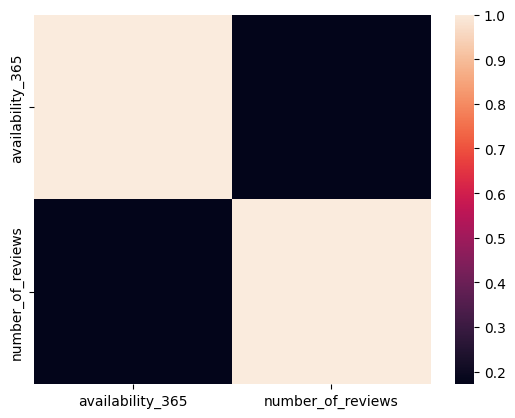

In [25]:
c = df[['availability_365','number_of_reviews']].corr()
sns.heatmap(c)
#no corelation between availability and number of reviews

In [26]:
df.sort_values(by='minimum_nights',ascending=False)

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
5767,4204302,17550546,Manhattan,Greenwich Village,40.73293,-73.99782,Entire home/apt,180,1250,2,0.03,1,365
2854,1615764,6676776,Manhattan,Battery Park City,40.71239,-74.01620,Entire home/apt,400,1000,0,0.72,1,362
38664,30378211,200401254,Manhattan,Greenwich Village,40.73094,-73.99900,Shared room,110,999,0,0.72,1,365
13404,10053943,2697686,Manhattan,Harlem,40.82915,-73.94034,Entire home/apt,99,999,2,0.07,1,42
26341,20990053,151084261,Brooklyn,Williamsburg,40.71772,-73.95059,Private room,79,999,24,1.12,6,249
...,...,...,...,...,...,...,...,...,...,...,...,...,...
38503,30295374,53215338,Brooklyn,Bushwick,40.69850,-73.93578,Private room,80,1,1,0.16,1,0
38504,30295700,23959538,Queens,Ridgewood,40.70268,-73.90824,Private room,36,1,0,0.72,1,0
13834,10447691,183151,Manhattan,Lower East Side,40.71578,-73.98201,Private room,47,1,0,0.72,1,0
28305,22007011,160702123,Brooklyn,Bushwick,40.69234,-73.90889,Private room,50,1,13,0.70,1,0


<Axes: xlabel='longitude', ylabel='latitude'>

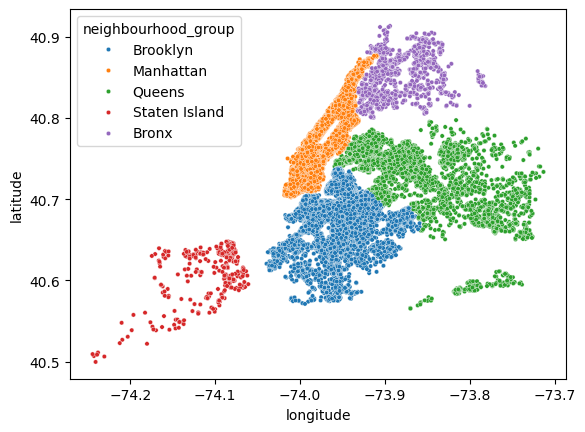

In [27]:
sns.scatterplot(data=df, x='longitude', y='latitude', hue='neighbourhood_group', s=10)

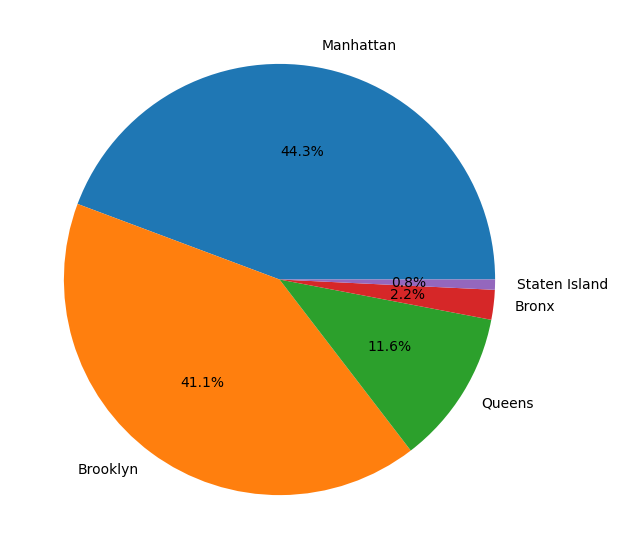

In [30]:
labels = df.neighbourhood_group.value_counts().index
sizes = df.neighbourhood_group.value_counts().values

plt.figure(0,figsize = (7,7))
plt.pie(sizes, labels=labels,  autopct='%1.1f%%')
plt.show()



room_type
Shared room         1160
Private room       22326
Entire home/apt    25409
Name: count, dtype: int64


<Axes: xlabel='room_type', ylabel='count'>

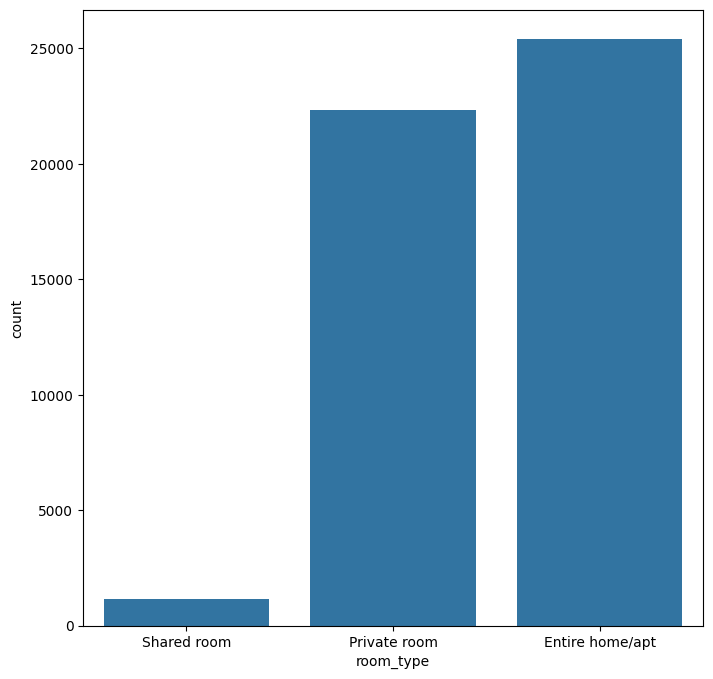

In [32]:
rooms_per_category = df['room_type'].value_counts().sort_values()
print(rooms_per_category)

plt.figure(figsize=(8,8))
sns.barplot(rooms_per_category)

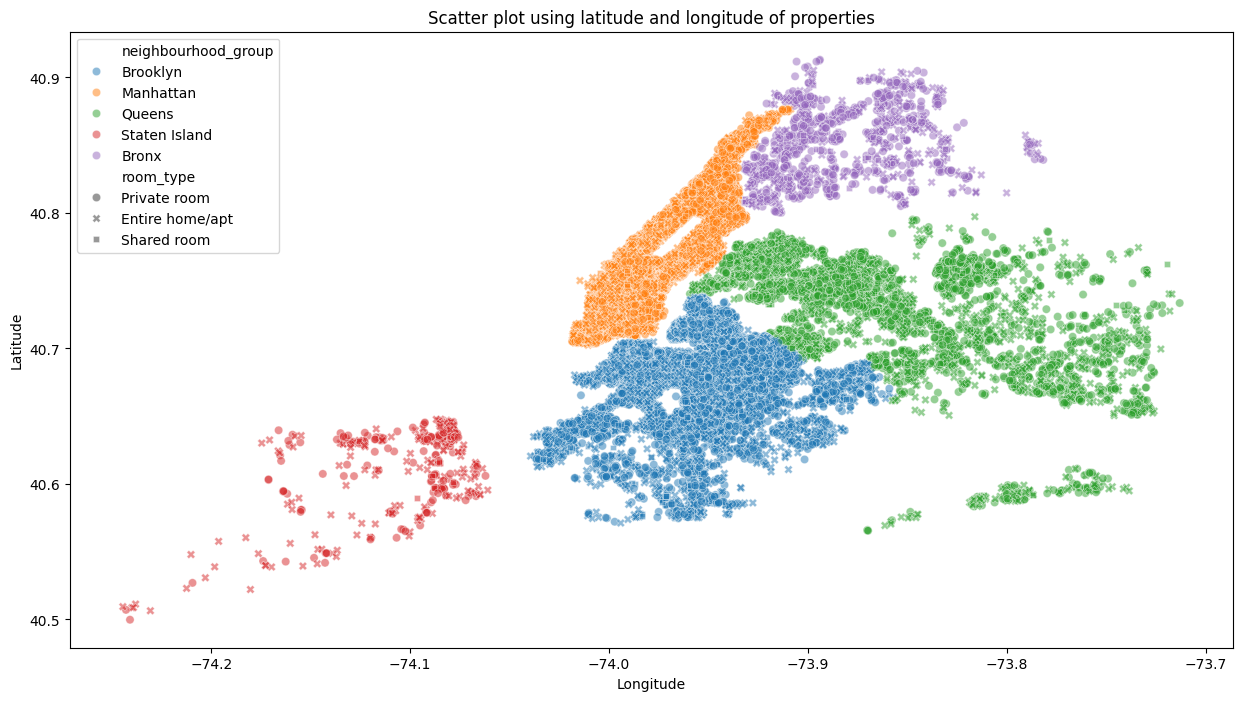

In [33]:
plt.figure(figsize=(15, 8))
sns.scatterplot(x = df['longitude'], y = df['latitude'], hue = df['neighbourhood_group'], alpha = 0.5, style = df['room_type'])
plt.title('Scatter plot using latitude and longitude of properties')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()